Calculus is one of the essential pillars of a good quantitative skillset (alongside linear algebra, statistics and geometry). Many of us have take some form of calculus in school and yet we often miss it's core intuitions.

At it's core, Calculus is the study of limits; it's a way of thinking about very abstract and challenging concepts and making them something we can get our hands--and heads--around. As such, Calculus really has two main tricks: differentiation and integration and the two are quite intimately related to one another. 

In this post, we're going to talk about differentiation and give an introduction to what it is and how we can use it. In the process, we're going to use the Python library `sympy` which will allow us to work with symbolic math thereby making it easy to explore differentiation in greater depth.

We'll start by importing sympy and numpy

In [1]:
import sympy as sm
import numpy as np
import matplotlib.pylab as pyl
from IPython.display import display, Math, Latex
sm.init_printing()

Now we'll use sympy to create a symbol "x". We go into greater detail with sympy in other posts but suffice it to say that making x a symbol rather than a variable means that we dont have to declare any particular value for x and this way of handling variables--as more abstract symbols, hence sympy--is much more in keeping with how we think about calculus.

In [2]:
x = sm.symbols('x')

Let's start simply by plotting some function of x which should be familiar to most: 

$$y = x^2$$ 

and we'll use our symbol x to decare this relationship with sympy

In [3]:
y = x**2

and we'll plot this function for values of x between 0 and 5.

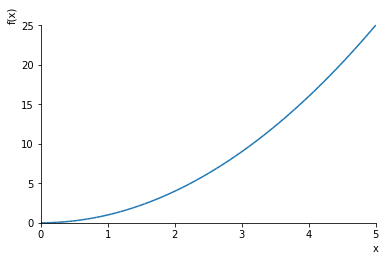

In [9]:
p1 = sm.plot(y, (x,0,5))
p1

Now to understand differentiation, let's imagine a pseudo real world scenario: Let's say that we have a car and the y-axis represents the distance our car has travelled (the odometer reading) and the x-axis represents time so we have a distance traveled for each point in time. 

We can appreciate that the slope of our line represens a change in distance traveled (y) over some time (x)--rise over run--and thus the this slope represents velocity. We can also appreciate that our velocity seems to be increasing as time goes on, that is to say, we're covering more meters per second for each successive second.

So we understand that our car is moving but how can we articulate an concept of *by how much* it's moving? To be more specific, how do we articulate this notion of velocity (meters moved per second)? The answer, as we'll see, lies in the slope of this line and differentiation describes how functions (such as $y = x^2$) contain not only information about the relationship between given $x$ and $y$ values but also the relationship between lines and their slopes.

Many students have taken calculus at some point in high school or college and learned a definition of differentiation that's somewhat paradoxical: "the instantaneous rate of change" of a function. If you pause for a moment to think on that, though, it's rather troubling. How can there be such a thing as an *instantaneous* rate of change? Doesn't all change happen *over time*? I said I wanted to know how much the velocity was changing at a given point in time, is my question nonsense? 

This line of questioning is really why Calculus exists and if you're struggling with those questions you're in good company as Newton, Liebniz and many others grappled with this as well. Calculus' magic is that it allows us to get at such a concept without getting hung up on its deep logical and philosophical issues. The truth is that there actually is no answer to the question "how much is the speed of the car changing at a given instant" but we can *approximate* such an answer through differentiation and, again, this whole theme of approximating things is really the heart and soul of calculus.

So to get back to our problem, we want to know how fast (that is, by how many meters per second) our car is moving at a given instant but first let's start simple: what if, instead of asking about an *instant* in time, we just asked about just a *small* interval in time? 

To dig into that, let's first write a function that will take in two points and return a function of the form y = mx + b for the line that goes through those two points:

In [12]:
def get_line_between_x_points(start, finish, y):
    x = sm.symbols('x')
    y_func = sm.lambdify(x, y, 'numpy')
    
    x1, y1 = start, y_func(start)
    x2, y2 = finish, y_func(finish)
    
    slope = (y2 - y1) / (x2 - x1)
    
    intercept = y1 - (slope*x1)
    
    return sm.sympify(slope*x + intercept)
    

Now we'll use that function to get the line between points x = 1 and x = 5 for example and we'll plot that alongside our original function. We'll also include an orange and green marker for reference which shows the current domain for x that we're considering.

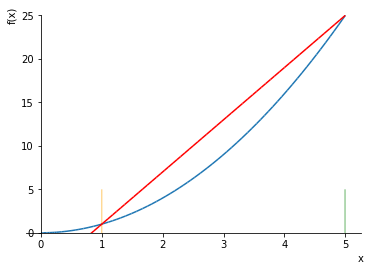

In [37]:
line1 = get_line_between_x_points(1, 5, y)

x_bound_l, x_bound_r = sm.symbols('x_bound_l, x_bound_r')

p2 = sm.plot(y, line1, (x,0,5), ylim=[0,25], show=False)

p2[1].line_color = 'red'

p2_left_bound = sm.plot_implicit(sm.Eq(x_bound_l, 1), line_color='orange', show=False)
p2_right_bound = sm.plot_implicit(sm.Eq(x_bound_r, 5), line_color='green', show=False)

p2.append(p2_left_bound[0])
p2.append(p2_right_bound[0])

p2.show()

we notice here that we get a sort of crude understanding of the rate of change of our blue line but we lose a lot of granualrity. For example, we get that the line has an upward slope (so we're moving) but, if all we had was the red line, we would probably think that we weren't actually accellerating; at least not from x = 1 through x = 5 and we wouldn't get the correct values for the slope of smaller domains of that blue line. If we were to ask ourselves, what is the velocity (that is, what's the meters per second slope) at 2? or at 3? the red line alone would give us the wrong answer. 

But what happens if we shrink that window? Let's say we're particularly interested in what happens at x=3.5, so let's shrink our window a bit around that number now getting the line that passes between x = 3 and x = 4:

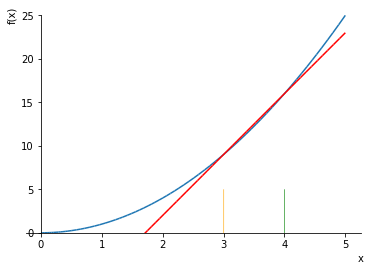

In [36]:
line1 = get_line_between_x_points(3, 4, y)

p2 = sm.plot(y, line1, (x,0,5), ylim=[0,25], show=False)
p2[1].line_color = 'red'

p2_left_bound = sm.plot_implicit(sm.Eq(x_bound_l, 3), line_color='orange', show=False)
p2_right_bound = sm.plot_implicit(sm.Eq(x_bound_r, 4), line_color='green', show=False)

p2.append(p2_left_bound[0])
p2.append(p2_right_bound[0])

p2.show()

this is better for sure because the red line now seems to hug closer to the blue line at our point of interest. In other words, for our point x = 3.5, the slope of the red line looks more like the slope of the blue line at that particular point.

Let's shrink the range of x again:

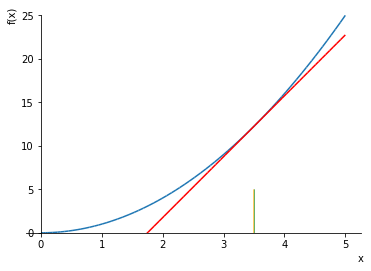

In [35]:
line1 = get_line_between_x_points(3.49, 3.51, y)

p2 = sm.plot(y, line1, (x,0,5), ylim=[0,25], show=False)
p2[1].line_color = 'red'

p2_left_bound = sm.plot_implicit(sm.Eq(x_bound_l, 3.49), line_color='orange', show=False)
p2_right_bound = sm.plot_implicit(sm.Eq(x_bound_r, 3.51), line_color='green', show=False)

p2.append(p2_left_bound[0])
p2.append(p2_right_bound[0])

p2.show()

... even better! Our range of x is getting pretty small (between 3.49 and 3.51) and, in reality, we could keep going, making it smaller and smaller still. 

If we follow that logic, what we're really asking for is the slope of a line between to points that are closer and closer together. That is to say we want the *change in y* for a given *change in x* as that change in x approaches 0. As we said earlier, there is no answer to that question when the change in x actually *is* 0 but we want to estimate what it might be, what the function would *behave like* as the change in x *approaches* 0.

In more mathematical terms, we would call this process *taking the derivative* of our function y and we would refer to the derivative as $y \prime$ (that's "y prime") and, what's more, we think of this derivative as being *with respect* to some variable, in this case x, because we're interested in the change in y for some given change in x. 

So what we're doing here is definining the derivative of some function $y = f(x)$ as $y \prime = lim_{x \to 0} ; {dy} / {dx}$ or "the change in y for a given change in x as that change in x (the space between points) gets smaller and smaller and approaches 0.

And interestingly, the derivative of a function is a function itself. In this case, for the function $y = x^2$, the derivative is $y \prime = 2x$.

If you're wondering why that is, let's think a bit about what we just did. We're interested in knowing the slope of our line $y = x^2$ between two points: x and x + some change in x (which we call ${dx}$). The slope, therefore, is equal to y2-y1 / x2 - x1 so, in this case, that becomes $( (x + {dx})^2 - x^2 ) / ( (x + {dx}) - x )$ which simplifies to $(2x{dx} + {dx}^2) / {dx}$ and, since we're talking about the slope, we can write the equivalency as $ {dy}/{dx} = (2x{dx} + {dx}^2) / {dx}$ and can simplify that to $ {dy} = (2x{dx} + {dx}^2)$. As we constrain the domain of x to become smaller and smaller, we push ${dx}^2$ into a negligibly small value and, thus we have ${dy} = 2x{dx}$ and another way to write that is ${dy}/{dx} = 2x$. This quite literally means "the change in y for some change in x is equal to 2x for a given x".

Let's take a minute to bask in what this means. This relationship (the fact that $y\prime = 2x{dx}$ for our function $y = x^2$ tells us how to find the slope of our line $y = x^2$ at any point $x$: it's just $2x$! 

To illustrate this, we can take a window over x and plot a line at each position for that window. We get an instresting output (all the red lines) which are tangential to our blue line ($y = x^2$ at their corresponding values of x. This is really what the derivative produces for us, you plug in a value for $x$ and you'll get the slope of a line tangent to your function at that point $x$. 

In [38]:
def make_colormap(num_colors):
    cm = pyl.get_cmap('Reds')

    colors = [ cm(1.*i/num_colors) for i in range(num_colors) ]
    return colors

In [39]:
x_max = 5
x_min = 0

lines = []

for i in range(x_max+1):
    
    x1 = x_min + i
    x2 = x1 + 1
    
    lines.append(get_line_between_x_points(x1, x2, y))

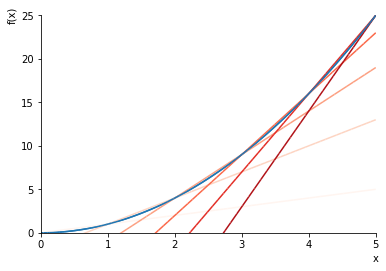

In [40]:
p4 = sm.plot(y, (x,0,5), ylim=[0,25], show=False)

for line,color in zip(lines,make_colormap(len(lines))):
    thing = sm.plot(line, (x,0,5), show=False, line_color=color)
    p4.append(thing[0])

p4.append(sm.plot(y, (x,0,5), ylim=[0,25], show=False)[0])
p4.show()

It's important to emphasize, however, that these things like derivatives (and integrals in later posts) aren't just "tricks" or shortcuts for calculation. They're deeply meaningful relationships. If some function $y = f(x)$ describes a relationship between values of $y$ and values of $x$, then things like the derivative describe that relationship in even greater depth. The math "works out" because these connections are based upon sound logic; they're both simple and profound.

Let's conclude by plotting our function $y = f(x)$ in blue alongside that line's derivative in green, we see something interesting: that the green line shows us the slope of our blue line at each given value of x. For x = 3.5, the green line has a value of y = 7 which tells us that the slope of the blue line at x = 3.5 is 7. For x = 2, the green line has a value of 4 on the y-axis which tells us that the slope of the blue line at x=2 is 4.

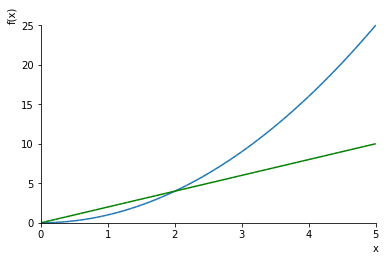

In [42]:
y_prime = y.diff(x)
p3 = sm.plot(y, y_prime, (x,0,5), show=False)
p3[1].line_color = 'green'
p3.show()

Both of these lines provide pretty powerful insight into how some set of $x$'s and some set of $y$'s relate to one another and we can do all kinds of really wonderful things when we weild these sorts of insights. So that's what derivation is all about, it's another layer of meaning in how functions work, namely, it relates a given function to its slope at any point in that function's domain.